# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Building Image Captioning System using SalesForce Blip Model </center>


Image captioning is an AI task aiming to automatically generate descriptive textual descriptions for images. This capability finds applications in diverse domains such as accessibility tools, content indexing, and enhancing user engagement on social media platforms.

The Salesforce Blip Model, integrated within the Hugging Face Transformers library, represents a significant advancement in handling image-captioning tasks. Developed by Salesforce, this model leverages state-of-the-art techniques in computer vision and natural language processing to accurately describe visual content.

In this notebook, we will delve into both conditional and unconditional approaches to image captioning using the Blip Model. By demonstrating two distinct examples — one with a general condition and another with a specific condition — we aim to underscore the importance of providing context or guidance to the model.

This process not only highlights how a well-defined condition can enhance the relevance and accuracy of generated captions but also serves as a method to fine-tune and optimize the model’s performance for specific use cases.


#### <a id="top"></a>
# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Introduction to Image Captioning </a> </li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Setting Up Working Environment </a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3. Loading the Model and Processor </a></li>
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Loading & Displaying the Image </a></li>
    <li><a href="#5" target="_self" rel=" noreferrer nofollow">5. Conditional Image Captioning </a></li>
    <li><a href="#6" target="_self" rel=" noreferrer nofollow">6. Unconditional Image Captioning </a></li>
    <li><a href="#7" target="_self" rel=" noreferrer nofollow">7. Trying Another Example with a Better Condition </a></li>

</ul>
</div>

***


<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Introduction to Image Captioning </b></div>


Image captioning is a process where a textual description is generated for a given image. This task involves both understanding the visual content of the image and expressing it in natural language, combining computer vision and natural language processing techniques. Image captioning has a wide range of applications, from helping visually impaired individuals understand visual content to enhancing content-based image retrieval systems.




<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Setting Up Working Environment </b></div>


Let’s start by setting up the working environments. First, we will download the packages we will use in this article. We will download the Transformers package and the torch package to use Pytorch.



In [1]:
!pip install transformers torch -q


In [2]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.1
    Uninstalling transformers-4.45.1:
      Successfully uninstalled transformers-4.45.1


<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Loading the Model and Processor </b></div>


We will need to load the model and the processor to perform the task. First, to load the model, we need to import the BleepForImageTextRetrieval class from the Transformers library.

Then, to load the model, you just need to call the class we imported and use the from_pretrained method to load the checkpoint. We will use the [BLIP model from Salesforce](https://huggingface.co/Salesforce/blip-itm-base-coco) for this task, and this is the related checkpoint for this specific task.

In [3]:
from transformers import BlipProcessor, BlipForConditionalGeneration
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Next, we will import the AutoProcessor class from the transformers library which is a convenient tool for handling preprocessing tasks such as tokenizing text and processing images to prepare them for model input.

In [4]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 4. Loading & Displaying the Image </b></div>

Next, to display the image in a Jupyter Notebook or similar environment, you can use the Image class from the PIL

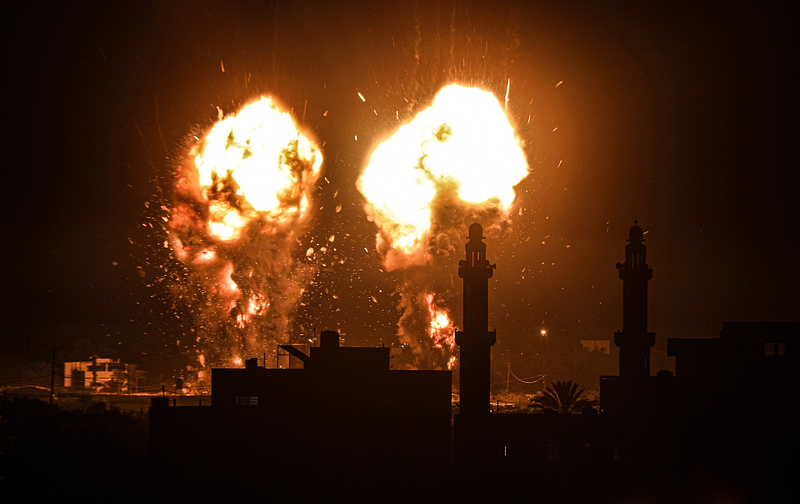

In [5]:
from PIL import Image
image = Image.open("/kaggle/input/gaza-images/gaza_under_fire.png")
image

If you are running this code outside a Jupyter Notebook, simply load the image with **Image.open** will not display it. Using **matplotlib** or another image display library will ensure the image is shown correctly.

<a id="5"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 5. Conditional Image Captioning </b></div>

To generate image captions using the BLIP model and the AutoProcessor from Hugging Face's transformers library, you need to pass both the image and the text prompt to the processor.
Running this code below will display the image and print the tensor representations of the processed inputs. These inputs can then be used with the BLIP model to generate captions or perform other tasks.

In [6]:
text = "a photograph of"
inputs = processor(image, text, return_tensors="pt")
inputs

{'pixel_values': tensor([[[[-1.6755, -1.6755, -1.6755,  ..., -1.6609, -1.6609, -1.6609],
          [-1.6755, -1.6901, -1.6901,  ..., -1.6609, -1.6609, -1.6755],
          [-1.6901, -1.6901, -1.6901,  ..., -1.6317, -1.6317, -1.6463],
          ...,
          [-1.7631, -1.7777, -1.7777,  ..., -1.7631, -1.7631, -1.7631],
          [-1.7777, -1.7777, -1.7631,  ..., -1.7631, -1.7485, -1.7631],
          [-1.7777, -1.7631, -1.7631,  ..., -1.7485, -1.7485, -1.7631]],

         [[-1.7071, -1.7071, -1.7071,  ..., -1.6921, -1.6921, -1.6921],
          [-1.7071, -1.7221, -1.7221,  ..., -1.7071, -1.6771, -1.7071],
          [-1.7221, -1.7221, -1.7221,  ..., -1.7071, -1.6921, -1.7071],
          ...,
          [-1.7521, -1.7521, -1.7521,  ..., -1.7371, -1.7371, -1.7371],
          [-1.7371, -1.7521, -1.7521,  ..., -1.7371, -1.7221, -1.7371],
          [-1.7371, -1.7521, -1.7521,  ..., -1.7221, -1.7221, -1.7371]],

         [[-1.4802, -1.4660, -1.4660,  ..., -1.4660, -1.4660, -1.4660],
          [-1

To generate a caption for the image using the BLIP model with the processed inputs, you can use the generate method of the model. After generating the output, you can decode it to get the caption.

In [7]:
out = model.generate(**inputs)
out

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


tensor([[30522,  1037,  9982,  1997,  1037,  2543,   102]])

Finally decode the output using the processor.decode method to get the caption in a readable format. Here's the updated code with the decoding and printing of the generated caption

In [8]:
print(processor.decode(out[0], skip_special_tokens=True))

a photograph of a fire


We can see that the caption is very generic, although it describes the image in general. However, it did not provide a more specific caption describing the real caption which is Israel bombing Gaza. Maybe it needs fine-tuning to provide a more realistic caption. Another possible solution we can also provide more guidance in the guidance text.

<a id="6"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 6. Unconditional Image Captioning </b></div>


Let's try Unconditional Image Captioning. This refers to a type of image captioning task where the model generates captions for an image without any specific guidance or additional input beyond the image itself.
In other words, the model generates captions solely based on the visual information present in the image, without being given any explicit prompts or cues about what the caption should focus on or describe.
We will follow the same steps as in conditional image captioning but without giving a text argument to the processor method.

In [9]:
inputs = processor(image,return_tensors="pt")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a fire is lit up in the night sky


We can see that the returned caption is almost similar to the previous one we got using conditional image captioning.

<a id="7"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 7. Trying Another Example with a Better Condition </b></div>


Let's try with another example in which we will provide better textual guidance to the captioning model. We will use the image below in which a group of Israeli soldiers are abusing Palestinian a child in Jerusalem streets.

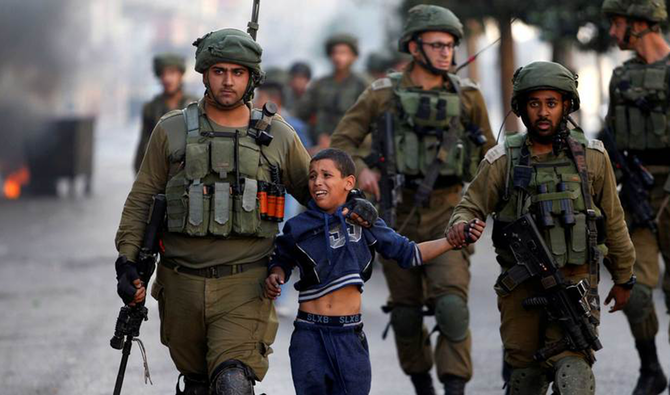

In [10]:
image = Image.open("/kaggle/input/gaza-images/israeli_abuse_child.png")
image

The text guidance we will use is Israeli soldiers and let's observe how this will improve the captioning process and also compare the results with the unconditional image captioning method. We will follow the same process as before. We will start by passing both the image and the text prompt to the processor.

In [11]:
text = "Israeli soldiers"
inputs = processor(image, text, return_tensors="pt")
inputs

{'pixel_values': tensor([[[[-0.1572, -0.1426, -0.1572,  ..., -1.1791, -1.5587, -1.6025],
          [-0.1572, -0.1572, -0.1718,  ..., -1.1207, -1.5295, -1.6025],
          [-0.1864, -0.1718, -0.1864,  ..., -1.1207, -1.5149, -1.5879],
          ...,
          [ 0.2807,  0.2515,  0.2223,  ...,  0.3975,  0.2661, -0.6682],
          [ 0.2661,  0.2515,  0.1931,  ...,  0.4413,  0.2807, -0.6390],
          [ 0.2223,  0.2661,  0.2369,  ...,  0.4851,  0.3829, -0.5222]],

         [[ 0.0338,  0.0488,  0.0338,  ..., -1.1218, -1.4519, -1.5270],
          [ 0.0338,  0.0338,  0.0188,  ..., -1.0467, -1.4369, -1.5120],
          [ 0.0038,  0.0188,  0.0038,  ..., -1.0317, -1.4219, -1.4970],
          ...,
          [ 0.3640,  0.3340,  0.3040,  ...,  0.5591,  0.4090, -0.5815],
          [ 0.3490,  0.3340,  0.2740,  ...,  0.6191,  0.4390, -0.5515],
          [ 0.3040,  0.3490,  0.3190,  ...,  0.6642,  0.5291, -0.4614]],

         [[ 0.3542,  0.3684,  0.3542,  ..., -0.9825, -1.2243, -1.2954],
          [ 0

Next, we will generate the caption for the image using the BLIP model with the processed inputs using the generate method of the model.

In [12]:
model.generate(**inputs)
out

tensor([[30522,  1037,  2543,  2003,  5507,  2039,  1999,  1996,  2305,  3712,
           102]])

Finally, we will decode the output into the text

In [13]:
print(processor.decode(out[0], skip_special_tokens=True))

a fire is lit up in the night sky


We can see that the generated caption is very precise even more than I expected. This was done by easily adding better guidance. To observe the difference let's generate the caption without using a textual condition.

In [14]:
inputs = processor(image,return_tensors="pt")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a child is led by soldiers as they patrol the streets


We can see the difference between the two captions. The first one is very specific and accurate. While the second one is very general. This shows the importance of good textual guidance.